epochs: 0
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 641us/step - loss: 2.2576 - acc: 0.1643 - val_loss: 2.2272 - val_acc: 0.1633
epochs: 1
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 320us/step - loss: 2.2067 - acc: 0.1786 - val_loss: 2.1906 - val_acc: 0.1800
epochs: 2
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 314us/step - loss: 2.1733 - acc: 0.1829 - val_loss: 2.1640 - val_acc: 0.1833
epochs: 3
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 311us/step - loss: 2.1446 - acc: 0.1957 - val_loss: 2.1409 - val_acc: 0.1833
epochs: 4
Train on 700 samples, validate on 300 samples
Epoch 1/1
700/700 [==============================] - 0s 309us/step - loss: 2.1187 - acc: 0.1929 - val_loss: 2.1152 - val_acc: 0.2000
epochs: 5
Train on 700 samples, validate on 300 samples

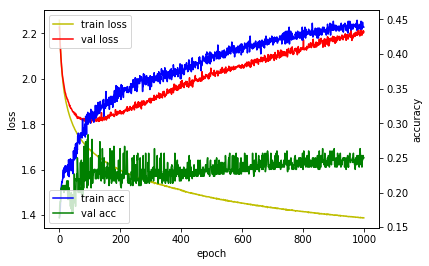

In [10]:
# 48p

# 0. 사용할 패키지 불러오기
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np

np.random.seed(3)
# 사용자 정의 히스토리 클래스 정의
class CustomHistory(keras.callbacks.Callback):
    def init(self):
        self.train_loss = []
        self.val_loss = []
        self.train_acc = []
        self.val_acc = []
    
    def on_epoch_end(self, batch, logs={}):
        self.train_loss.append(logs.get('loss'))
        self.val_loss.append(logs.get('val_loss'))
        self.train_acc.append(logs.get('acc'))
        self.val_acc.append(logs.get('val_acc'))

# 1. 데이터셋 생성하기

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리
x_train = x_train.reshape(50000, 784).astype('float32') / 255.0
x_val = x_val.reshape(10000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0

# 훈련셋과 검증셋 고르기
train_rand_idxs = np.random.choice(50000, 700)
val_rand_idxs = np.random.choice(10000, 300)
x_train = x_train[train_rand_idxs]
y_train = y_train[train_rand_idxs]
x_val = x_val[val_rand_idxs]
y_val = y_val[val_rand_idxs]

# 라벨데이터 원핫인코딩 (one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=2, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
custom_hist = CustomHistory()
custom_hist.init()

for epoch_idx in range(1000):
    print ('epochs: ' + str(epoch_idx))
    model.fit(x_train, y_train, epochs=1, batch_size=10, validation_data=(x_val, y_val), callbacks=[custom_hist])

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()